In [1]:
import glob
import os

In [23]:
def make_sort_key(x):
    date = x.split("/")[-1].split(" ")[-1].split(".")
    target = date[0] + date[1] + date[2]
    return int(target)

# make_sort_key("./datasets/raw/스크린샷 2022-10-16 22.56.22.png")

In [28]:
files = glob.glob("./datasets/raw/*.png")

files.sort(key=lambda x: make_sort_key(x))

files[:4]

['./datasets/raw/스크린샷 2022-10-16 22.57.38.png',
 './datasets/raw/스크린샷 2022-10-16 22.57.45.png',
 './datasets/raw/스크린샷 2022-10-16 22.58.33.png',
 './datasets/raw/스크린샷 2022-10-16 22.58.38.png']

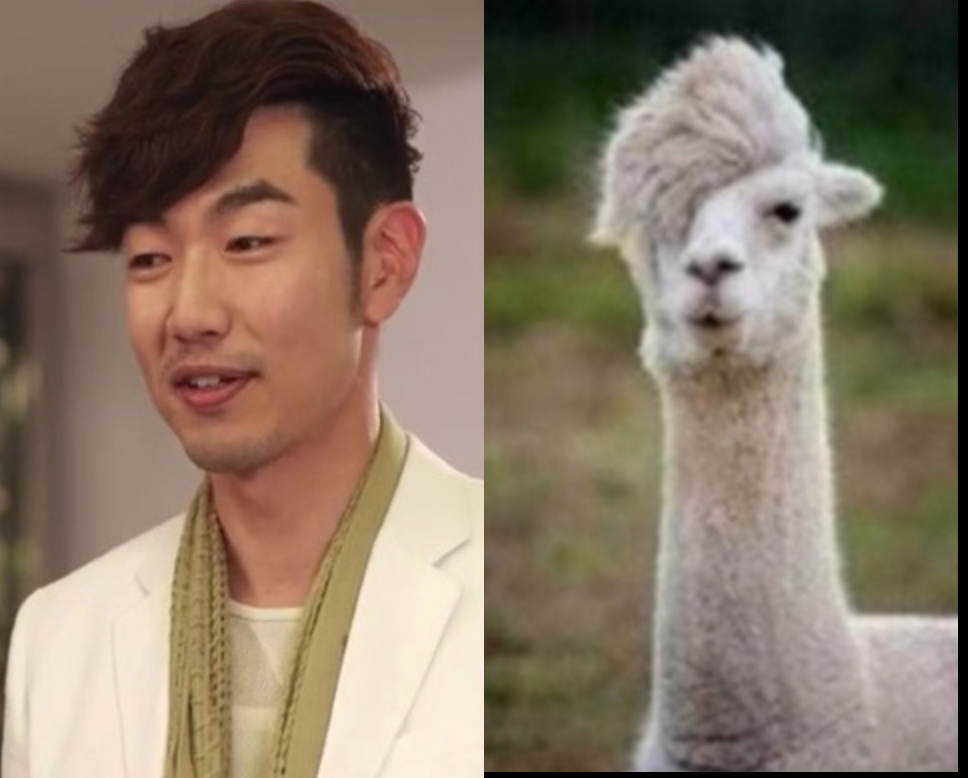

In [29]:
from PIL import Image
from utils import makegrid

images = []
for i in range(2):
    img = Image.open(files[i])
    images.append(img)

grid_image = makegrid(images, 1, 2)

grid_image

In [30]:
def get_filename(path):
    return path.split("/")[-1]

for i, path  in enumerate(files): 
    filename = get_filename(path)

    # 데이터 수집 순서에 따라서 타겟을 바꾸자 
    target = "./datasets/input" if i%2 == 0 else "./datasets/output"

    new_dir = os.path.join(target, filename)

    os.replace(path, new_dir)